In [40]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
Alternative_Fuel_Vehicles_US = pd.read_csv('../Datasets/Alternative Fuel Vehicles US.csv')
Electric_and_Alternative_Fuel_Charging_Stations = pd.read_csv('../Datasets/Electric and Alternative Fuel Charging Stations.csv')
ElectricCarData_Clean = pd.read_csv("../Datasets/ElectricCarData_Clean.csv")
ElectricCarData_Norm = pd.read_csv("../Datasets/ElectricCarData_Norm.csv")
Light_Duty_Vehicles  = pd.read_csv("../Datasets/Light Duty Vehicles.csv")
taxi_zone_lookup = pd.read_csv("../Datasets/taxi+_zone_lookup.csv")
Vehicle_Fuel_Economy_Data = pd.read_csv('../Datasets/Vehicle Fuel Economy Data.csv')
taxi_zone_lookup = pd.read_csv('../Datasets/taxi+_zone_lookup.csv')

Función `range_data` extrae un rango de archivos Parquet y los carga como DataFrames. Los parametros solicitados son:
- `url_trim` Porción de la url que se mantiene invariable
- `start_m` Mes del intervalo inferior
- `start_y` Año del intervalo inferior
- `end_m` Mes del intervalo superior
- `end_y` Año del intervalo superior

In [41]:
def downloaddf(url_trim:str,month:int,year:int):
    if len (str(int(month)))==1:
        month='0'+str(month)
    return  pd.read_parquet(url_trim+str(year)+'-'+str(month)+'.parquet')

def range_data(url_trim:str,start_m:int, start_y:int, end_m:int, end_y:int):
    if end_y - start_y < 0:
        return 'Error:  End Year is smaller than Start Year'
    elif end_y ==  start_y and end_m < start_m:
        return 'Error:  End Month is smaller than or equal to Start Month'
    elif start_m > 12 or end_m > 12:
        return 'Error: End Month or  Start Month is larger than 12'
    elif end_y ==  start_y and end_m == start_m:
        return downloaddf(url_trim,start_m,start_y)
    elif end_y == start_y:
        df1 =downloaddf(url_trim,start_m,start_y)
        for i in range(start_m + 1,end_m + 1):
            df2 =downloaddf(url_trim,i,start_y)
            df1 = pd.concat([df1,df2],ignore_index=True)
            del df2
        return df1
    elif  end_y > start_y:
        df1 =downloaddf(url_trim,start_m,start_y)
        for j in range(start_y ,end_y + 1):
            for k in range(start_m + 1,13):
                if  j==end_y and  k > end_m :break
                df2 =downloaddf(url_trim,k,j)
                df1 = pd.concat([df1,df2],ignore_index=True)
                del df2
            start_m  = 1
        return df1

Carga de datos para Yellow Taxi de NYC

In [23]:
url_trim = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_20'
yellow_taxi = range_data(url_trim,12,23,2,24)

In [24]:
yellow_taxi.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,6.384093e+06,6384093,6384093,6.018480e+06,6.384093e+06,6.018480e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.384093e+06,6.018480e+06,6.018480e+06
mean,1.752486e+00,2024-01-13 16:31:28.945933,2024-01-13 16:48:36.978548,1.369609e+00,3.763223e+00,1.944311e+00,1.653185e+02,1.641954e+02,1.153407e+00,1.890391e+01,1.462321e+00,4.831266e-01,3.416135e+00,5.440987e-01,9.756331e-01,2.763841e+01,2.268330e+00,1.333158e-01
min,1.000000e+00,2002-12-31 22:16:54,2003-01-01 15:02:08,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.087300e+03,-3.917000e+01,-5.000000e-01,-1.400000e+02,-7.000000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2023-12-13 23:16:37,2023-12-13 23:32:55,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.570000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-12-29 18:40:00,2023-12-29 18:59:32,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.740000e+00,0.000000e+00,1.000000e+00,2.090000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-02-14 21:58:05,2024-02-14 22:11:57,1.000000e+00,3.180000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.340000e+00,0.000000e+00,1.000000e+00,3.024000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-03-01 00:01:37,2024-03-01 23:24:42,9.000000e+00,2.224783e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.792000e+03,5.168000e+01,4.217000e+01,4.174000e+03,1.613800e+02,1.000000e+00,9.792000e+03,2.500000e+00,1.750000e+00
std,4.330862e-01,NaN,NaN,8.759375e-01,2.076626e+02,9.188762e+00,6.414206e+01,6.948778e+01,5.934547e-01,1.882650e+01,1.805865e+00,1.192560e-01,4.328577e+00,2.162906e+00,2.179661e-01,2.345311e+01,8.104277e-01,4.747537e-01


In [25]:
yellow_taxi[yellow_taxi['tpep_pickup_datetime'].dt.year < 2023]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
1128759,2,2002-12-31 22:16:54,2003-01-01 15:02:08,1.0,3.25,1.0,N,132,10,1,14.9,1.75,0.5,3.63,0.00,1.0,21.78,0.0,0.00
2531205,2,2002-12-31 23:03:18,2003-01-01 21:09:44,1.0,28.19,2.0,N,132,13,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75
2601397,2,2009-01-01 00:02:41,2009-01-01 17:43:28,1.0,1.37,1.0,N,230,142,1,10.7,0.00,0.5,1.47,0.00,1.0,16.17,2.5,0.00
3557850,2,2008-12-31 22:52:49,2008-12-31 23:04:09,1.0,1.62,1.0,N,141,211,1,11.4,2.50,0.5,2.00,0.00,1.0,19.90,2.5,0.00
4275420,2,2009-01-01 00:02:13,2009-01-01 00:48:28,1.0,0.57,1.0,N,79,148,1,9.3,1.00,0.5,2.86,0.00,1.0,17.16,2.5,0.00


Eliminando registros atipicos con fechas anteriores del año 2023 en la variable `tpep_pickup_datetime`

In [26]:
yellow_taxi = yellow_taxi[yellow_taxi['tpep_pickup_datetime'].dt.year >= 2023]
print(yellow_taxi['tpep_pickup_datetime'].dt.date.loc[6384092] - yellow_taxi['tpep_pickup_datetime'].dt.date.loc[0]) 

90 days, 0:00:00


Determnando la demanda como la razón entre el número de viajes `Trips` entre el total de dias que registran los datos

In [35]:
yellow_taxi['Hour_pickup'] = yellow_taxi['tpep_pickup_datetime'].dt.hour
demanda = yellow_taxi.groupby('Hour_pickup')[['Hour_pickup']].count()
demanda['trip_per_hour'] = demanda['Hour_pickup'] / 90
demanda = demanda.rename(columns={'Hour_pickup': 'Trips'})

Grafica del comportamiento promedio (media) de la demanda de Yellow Taxis en función de la hora del día

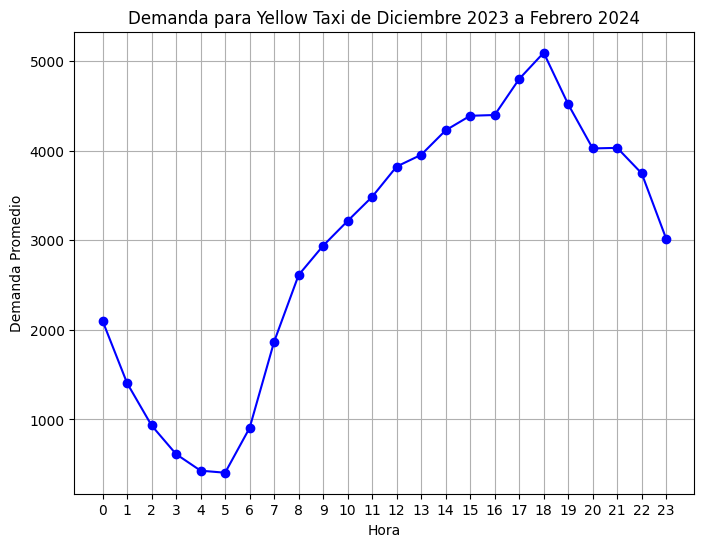

In [32]:
# Crear la gráfica de líneas
plt.figure(figsize=(8, 6))
plt.plot(demanda.index, demanda['trip_per_hour'], marker='o', linestyle='-', color='b')
plt.title('Demanda para Yellow Taxi de Diciembre 2023 a Febrero 2024')
plt.xlabel('Hora')
plt.ylabel('Demanda Promedio')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


In [34]:
demanda

,Trips,trip_per_hour
Hour_pickup,,
0,189000,2100.000000
1,126535,1405.944444
2,83965,932.944444
3,55206,613.400000
4,38587,428.744444
5,36527,405.855556
6,81529,905.877778
7,168131,1868.122222
8,235114,2612.377778


Carga de datos para Green Taxi de NYC

In [42]:
url_trim = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_20'
green_taxi = range_data(url_trim,12,23,2,24)

In [43]:
green_taxi.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,117792.000000,117792,117792,109952.000000,117792.000000,117792.000000,109952.000000,117792.000000,117792.000000,117792.000000,117792.000000,117792.000000,117792.000000,0.0,117792.000000,117792.000000,109952.000000,109945.000000,109952.000000
mean,1.871417,2024-01-12 18:16:38.763303,2024-01-12 18:36:10.042804,1.165190,96.510578,139.446448,1.298630,21.694109,17.995397,0.902500,0.570960,2.298784,0.219258,NaN,0.985899,23.520912,1.329398,1.035199,0.762624
min,1.000000,2023-11-24 21:03:34,2023-11-24 21:22:29,1.000000,1.000000,1.000000,0.000000,0.000000,-220.000000,-5.000000,-0.500000,-0.010000,-6.940000,NaN,-1.000000,-221.000000,1.000000,1.000000,-2.750000
25%,2.000000,2023-12-14 07:34:00.750000,2023-12-14 07:50:27.750000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-12-28 17:15:07,2023-12-28 17:39:59,1.000000,75.000000,138.000000,1.000000,1.830000,13.500000,0.000000,0.500000,2.000000,0.000000,NaN,1.000000,18.780000,1.000000,1.000000,0.000000
75%,2.000000,2024-02-14 09:06:40.500000,2024-02-14 09:23:00.250000,1.000000,116.000000,223.000000,1.000000,3.210000,20.500000,1.000000,0.500000,3.550000,0.000000,NaN,1.000000,27.300000,2.000000,1.000000,2.750000
max,2.000000,2024-02-29 23:56:40,2024-03-01 19:56:23,99.000000,265.000000,265.000000,9.000000,134625.460000,1618.600000,10.000000,4.250000,222.000000,46.760000,NaN,1.000000,1622.600000,5.000000,2.000000,2.750000
std,0.334739,NaN,NaN,1.098163,58.032769,76.541480,0.943953,953.520947,19.889685,1.359934,0.383743,3.120757,1.289217,NaN,0.136173,21.270778,0.501563,0.184284,1.230827


In [44]:
print(green_taxi['lpep_pickup_datetime'].dt.date.loc[117791] - green_taxi['lpep_pickup_datetime'].dt.date.loc[0])

90 days, 0:00:00


Determnando la demanda como la razón entre el número de viajes `Trips` entre el total de dias que registran los datos

In [45]:
green_taxi['Hour_pickup'] = green_taxi['lpep_pickup_datetime'].dt.hour
demandaG = green_taxi.groupby('Hour_pickup')[['Hour_pickup']].count()
demandaG['trip_per_hour'] = demandaG['Hour_pickup'] / 90
demandaG = demandaG.rename(columns={'Hour_pickup': 'Trips'})

Grafica del comportamiento promedio (media) de la demanda de Green Taxis en función de la hora del día

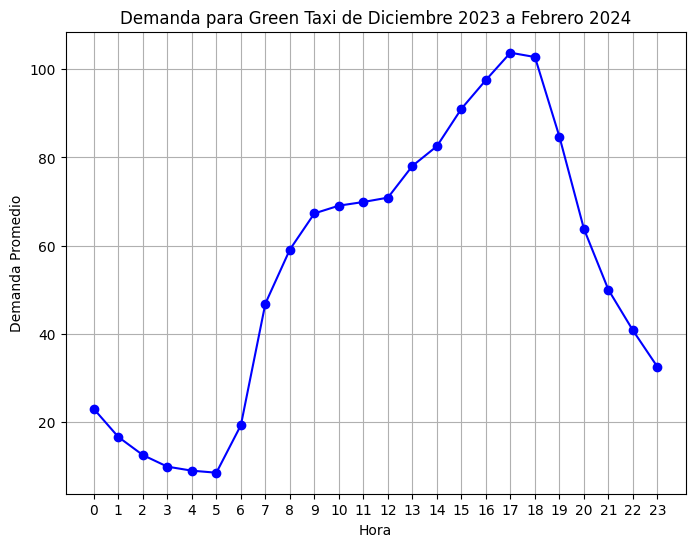

In [46]:
# Crear la gráfica de líneas
plt.figure(figsize=(8, 6))
plt.plot(demandaG.index, demandaG['trip_per_hour'], marker='o', linestyle='-', color='b')
plt.title('Demanda para Green Taxi de Diciembre 2023 a Febrero 2024')
plt.xlabel('Hora')
plt.ylabel('Demanda Promedio')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()